
---
<p style="text-align: center;">
<font size="5"> <b>Stock portfolio Strategy for recession periods <br>
Markotvitz Approach<b> </font> </p>

---



### Table of contents

1. [Introduction]()
2. [Model]()
3. [Data Wrangling]()<br>
   - Libraries
   - Data Collection
   - Setting Initial Dataframe
4. [Simulations]()
   - Setting the final Dataframe
   - Locating main findings
5. [Visualizations]()
6. [Conclutions]()



#### 1. Introduction

Its evident that nowadays the economic outlook its getting worse and worse every day. The pandemic effects, thar war tensions and the sharp slowdown in gdp for the main economies has led to stagflation all over the world.
So, considering the increasing possibility of a near future recession, here its proposed a portfolio strategy using stocks that had outperformed in past recessions in order to develop an alternative option for those investors who still want to keep their positions in the stock market without changing to the fixed one in a recession scenery. The strategy was made based on the Markovitz portfolio theory model approach.

#### 2. Model

$$ E(R_{p}) = \sum\limits_{j=1}w_{j}E(R_{i}) $$


$$\small R_{p} = return \ of \ portfolio $$ 
$$\small E_{i} = return \ of \ asset \ i$$ 
$$\small W_{j} = weight \ of \ asset \ j$$ 

<br>

$$ \sigma^{2}_{p} = \sum\limits_{j}w^{2}_{j}\sigma^{2}_{i}+\sum\limits_{j}\sum\limits_{j!=i}w_{i}w_{j}\sigma_{i}\sigma_{j}\rho_{ij}$$

$$\small \sigma^{2}_{p} = portfolio \ variance $$ 
$$\small \rho_{ij} = correlation \ between \ asset \ ij$$ 




#### 3. Data Wrangling

**Libraries**

In [1]:
import pandas_datareader.data as web #To collect data
import datetime as dt #To specify start and end dates
import pandas as pd #To read files or work with dataframes
import matplotlib.pyplot as plt #To visualize
import numpy as np #To get random weights
plt.style.use('fivethirtyeight')

**Data collection**

In [6]:
#Choosing the stock tickers, the time period to get the prices - number of simulations -risk free as zero
#And returns 1 as an empty dataframe to store the prices
tickers = ['WM','MCD','PG','JNJ','HD'] 
start = dt.datetime(2010, 1, 1) 
end = dt.datetime(2020,12,1)

number_of_portfolios = 1000
RF = 0
returns1 = pd.DataFrame 

**Setting initial dataframe**

In [7]:
#Creating a for loop to iterate over the tickers list to extract the prices
for ticker in tickers:
     data = web.DataReader(ticker, 'yahoo', start, end)
     data = pd.DataFrame(data)
     #new column created on the dataframe
     #the new column gets the pct change of the stock 
     data [ticker] = data ['Adj Close'].pct_change()
     
     #Condition to append the first iteration 
     if returns1.empty:
        returns1 = data[[ticker]]
      #Condition to keep inner joining the pct columns to the big dataframe (returns1)
     else:
        returns1 = returns1.join(data[[ticker]], on='Date')

print(returns1.head())

                  WM       MCD        PG       JNJ        HD
Date                                                        
2010-01-04       NaN       NaN       NaN       NaN       NaN
2010-01-05 -0.004391 -0.007646  0.000327 -0.011596  0.007325
2010-01-06 -0.000294 -0.013643 -0.004743  0.008134 -0.003463
2010-01-07  0.002353  0.007323 -0.005423 -0.007137  0.011814
2010-01-08  0.004695 -0.000969 -0.001322  0.003438 -0.004808


In [8]:
#Now, lets create the empty list to append the risk, return, sharpe ratios and weights 
#From the simulation
portfolio_returns = []
portfolio_risk = []
sharpe_ratios = []
portfolio_weights = []

#### 4. Simulations - Monte carlo

In [9]:
for portfolio in range (number_of_portfolios):

    #Weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round(weights / np.sum(weights),3) #to get the sum of weights equal to 1# getting the random weights #
    portfolio_weights.append(weights)
   
    #calculate annualized returns1 (multiplied for 252 in order to get the information for a year, 252 is applied only for stocks)
    annualized_returns = np.sum(returns1.mean() * weights) * 252  # (wi*ri + wi*ri) *252 # get the portfolio return and multiply it by 252 #
    portfolio_returns.append(annualized_returns)
    
    #Matrix Covariance & Portfolio risk calculation
    matrix_covariance = returns1.cov() * 252 #*252 to get the info for a year
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights)) 
    
    #Portfolio Risk
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)

    #SHARPE RATIO
    sharpe_ratio = (annualized_returns - RF) / portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)

**Setting the final dataframe**

In [20]:
#Once the simulation is done, the risk,sharpe,weight and return list are put in a single list
#then that list of metris is turn into a dataframe
#with the proper columns names
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratios = np.array(sharpe_ratios)

portfolio_metrics = [portfolio_returns,portfolio_risk, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T #ITS KEY to put the .T in order to transpose the data in order to see it #
portfolios_df.columns = ['Return','Risk','Sharpe','Weights'] #ITS KEY to add the columns name to the dataframe #

In [21]:
print(portfolios_df.head())

     Return      Risk    Sharpe                              Weights
0  0.129434  0.151949  0.851826  [0.103, 0.086, 0.691, 0.117, 0.003]
1  0.162056  0.147517  1.098554   [0.285, 0.21, 0.255, 0.099, 0.151]
2  0.163945  0.148677  1.102693    [0.137, 0.246, 0.086, 0.332, 0.2]
3  0.161623  0.149832  1.078695  [0.262, 0.335, 0.021, 0.264, 0.119]
4  0.164466  0.150101  1.095705  [0.066, 0.101, 0.355, 0.211, 0.267]


**Locating Main Findings**

In [22]:
# IDENTIFYING THE PORTFOLIOS WITH MINIMUN RISK, HIGHEST RETURN AND THE HIGHEST SHARPE RATIO 

#locating in the dataframe the row where the risk is minimum 
min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()] 

#locating in the dataframe the row where the return is max and min
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()] 
lowest_return =  portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmin()]

#locating in the dataframe the row where the sharpe is max
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()] 

In [23]:
#Minimun variance 
print(min_risk)

#Minimun variance efficient 
print(highest_sharpe)

Return                                0.137926
Risk                                   0.14143
Sharpe                                0.975218
Weights    [0.183, 0.224, 0.261, 0.327, 0.004]
Name: 879, dtype: object
Return                                0.204834
Risk                                  0.173073
Sharpe                                1.183514
Weights    [0.299, 0.133, 0.022, 0.064, 0.482]
Name: 53, dtype: object


#### 5. Visualization


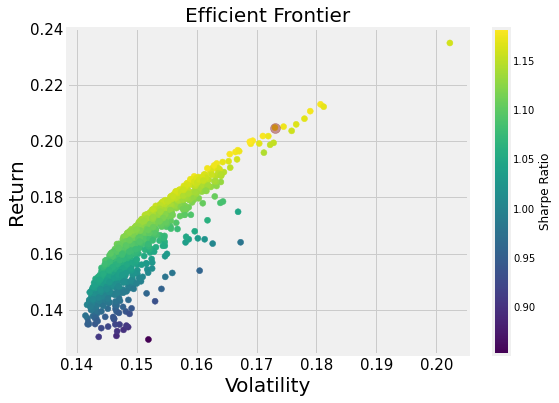

In [26]:

plt.figure (figsize = (8,6))
plt.scatter(portfolio_risk,portfolio_returns, c = portfolio_returns / portfolio_risk) # c is coloring portfolio return / portfolio risk thats the sharpe ratio
plt.title('Efficient Frontier', fontsize = 20)
plt.xlabel ('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe Ratio')
#RED DOT AS MAX SHARPE RATIO PORTFOLIO
plt.scatter(highest_sharpe['Risk'],highest_sharpe['Return'], s=100, facecolor='maroon', alpha=0.4)
plt.show()